# Data Analysis and Knowledge Discovery: Exercise 3, Supervised learning

This is the template for the third exercise. The idea of this exercise is to apply supervised learning to predict the ship type using certain attributes (speed, destination harbour...) and a K nearest neighbors (kNN) classifier.

### General guidance for exercises 

- Answer **all** questions below, even if you can't get your script to fully work
- Write clear and easily readable code, include explanations what your code does
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots
- Before saving the ipynb file (and possible printing) run: "Restart & Run all", to make sure you return a file that works as expected.
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
- +1 bonus point (grading *Pass with honors*) requires a **completely** correct solution and also thorough analysis. 
- Note! Don't leave it to the last moment! No feedback service during weekends.
- Using the colors for titles in markdown makes the document more readable and easier to check. 

- This excercise is a bit more freeform than the last one and you don't have to stick to only the cells that are already in the notebook - you can make more if you need to, but it is advisable to comment on new cells what the cell is related to. 
- There are also added summaries of whats included inthe subparts of exercises  just to help you get a better picture of what is required. You will still answer these excercises under their own titles.

### Gather **all** packages needed for this notebook here:
- you can use other packages as well, but this excercise can be completed with those below

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as math
import sklearn as sklearn
import random as random
from scipy import stats
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut, cross_val_score, cross_val_predict, cross_validate
from sklearn import preprocessing

________
## <font color = dimgrey> Data import </font> 


In [ ]:
data_path = "https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata_2021.csv"

In [ ]:
#Import the data here
data = pd.read_csv(data_path) #data is presumed to be in the same folder. 

_______________
## <font color = dimgrey> 1) Data preprocessing
Below are all the questions related to this topic, but you should put them under their own respective titles that are found below.

- a) First, find out how many different destinations there are in the data. Do you need to make any preprocessing? **1p** <br>
- b) Destination harbor is a categorical variable. It needs to be converted into a numerical representation. Explain, why do you need to make this step? You can use get_dummies from pandas to implement one-hot coding for categorical features **1p**

- c) Plot Gross tonnage versus the ship Length. Use different colors for different ship types. According to the plot, there is one <b> clear outlier. </b>  Correct the outlying value by changing it to the value 326 and rerun the plot after you have made the correction. **1p**
- d) It is good to exploit domain knowledge and make some reasonable transformation to the feature values to improve the expected results and/or to avoid redundancy. Find out what gross tonnage means. Make some transformation to Length values to acquire a linear relationship between the transformed length and Gross tonnage values. You can find the needed information  https://en.wikipedia.org/wiki/Gross_tonnage. Look at the formula and think how you can get the two variables similarly scaled. If you are having trouble, just experiment with different transformations before asking help. By plotting you can see what the relationship looks like after a transformation you have tried **1p**
- e) The numerical variables have quite different ranges. To ensure that all variables can have the same importance on the model, perform Z-score standardization. Perform it for speed, the ***transformed length*** variable, and breadth **1p**
_______________________

#### <font color = dimgrey> a) Find out how many different destinations there are in the data. Are there any mistakes and do you need to do any preprocessing? Give your code and answer below **1p** </font>

In [ ]:
### Code for 1.a) 
# Let's make the dataframe out of the data for preprocessing
shipframe = pd.DataFrame(data)

# Counting all the different destinations for Destination column
# https://pandas.pydata.org/docs/reference/api/pandas.unique.html
# df.unique() to get hash table-based unique
uniqueDestinations = shipframe['Destination'].unique()
uniqueDestinationNumber = shipframe['Destination'].nunique()
print('----Before preprocessing----')
print('Different destinations are', uniqueDestinations, 'and the number of them is', uniqueDestinationNumber)

# As we can see drom the print, there are two destinations Sillamäe and Sillamae which mean the same city in Estonia
display(shipframe[shipframe['Destination'] == 'Sillamäe'])
display(shipframe[shipframe['Destination'] == 'Sillamae'])

# There are two Sillamäe and one Sillamae so let's assume the format of SillamÄe is correct
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
# Replacing the incorrect value with a correct one by using df['<col name>'].replace(<to_replace>, <value>)
# inplace=True to perform operation inplace
shipframe['Destination'].replace('Sillamae', 'Sillamäe', inplace=True)

# Let's check the unique values again and see if there are any mistakes left
correctedDestinations = shipframe['Destination'].unique()
correctedNumber = shipframe['Destination'].nunique()
print('----After preprocessing----')
print('Different destinations are', correctedDestinations, 'and the number of them is', correctedNumber)

# And then some other checks
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info
# to print a concise summary
print('--------------------------')
shipframe.info()
print('--------------------------')
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html?highlight=duplicate
# to check duplicates
print('Any NaN values?\n', shipframe.isna().any()) #.any() to not get the whole 134 value list
print('--------------------------')
print('Any duplicates?', shipframe.duplicated().any()) #.any() to not get the whole 134 value list

----Before preprocessing----
Different destinations are ['Hamina' 'Helsinki' 'Kotka' 'Kronshtadt' 'Kunda' 'Muuga' 'Paldiski'
 'Porvoo' 'Primorsk' 'Sillamäe' 'Sillamae' 'Tallinn' 'Ust-Luga'
 'Valko-Loviisa' 'Viipuri' 'Vuosaari' 'Vysotsk'] and the number of them is 17


,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
76,248792000,11.4175,71.6657,Sillamäe,Tanker,2627,92.86,14.1
77,353566000,12.4437,80.1423,Sillamäe,Tanker,17712,169.90,25.4


,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
78,374538000,10.0683,94.5346,Sillamae,Cargo,6354,108.5,18.6


----After preprocessing----
Different destinations are ['Hamina' 'Helsinki' 'Kotka' 'Kronshtadt' 'Kunda' 'Muuga' 'Paldiski'
 'Porvoo' 'Primorsk' 'Sillamäe' 'Tallinn' 'Ust-Luga' 'Valko-Loviisa'
 'Viipuri' 'Vuosaari' 'Vysotsk'] and the number of them is 16
--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MMSI           134 non-null    int64  
 1   Speed          134 non-null    float64
 2   COG            134 non-null    float64
 3   Destination    134 non-null    object 
 4   Ship_type      134 non-null    object 
 5   Gross_tonnage  134 non-null    int64  
 6   Length         134 non-null    float64
 7   Breadth        134 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 8.5+ KB
--------------------------
Any NaN values?
 MMSI             False
Speed            False
COG              False

<font color = red> As I wrote in the comments, there were two values -- Sillamäe and Sillamae -- which were actually meaning the same city in Estonia. There were two Sillamäe and one Sillamae, and since the city is correclty written with the letter ä, I corrected the one with the letter a.

<font color = red>There are no missing values or duplicates as can be seen from the prints.

____________
#### <font color = dimgrey> b) Destination harbor is a categorical variable. It needs to be somehow converted into a numerical expression. Explain, why do you need to make this step? 
You can use get_dummies from pandas to implement onehot coding for categorical features **1p**

In [ ]:
### Code for 1.b)

# For fun, let's check how many different destinations we have (classification and prediction in mind)
# Let's do this before one-hot encoding so we can do it simply
print(shipframe['Destination'].value_counts())

# https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
# .get_dummies() to convert categorical variable into dummy or indicator variables

shipframe = pd.get_dummies(shipframe, columns=['Destination'])
shipframe.head()

Hamina           19
Porvoo           18
Ust-Luga         16
Muuga            12
Tallinn          12
Valko-Loviisa     9
Paldiski          9
Kotka             8
Vuosaari          7
Viipuri           6
Vysotsk           5
Primorsk          5
Sillamäe          3
Kronshtadt        2
Kunda             2
Helsinki          1
Name: Destination, dtype: int64


,MMSI,Speed,COG,Ship_type,Gross_tonnage,Length,Breadth,Destination_Hamina,Destination_Helsinki,Destination_Kotka,Destination_Kronshtadt,Destination_Kunda,Destination_Muuga,Destination_Paldiski,Destination_Porvoo,Destination_Primorsk,Destination_Sillamäe,Destination_Tallinn,Destination_Ust-Luga,Destination_Valko-Loviisa,Destination_Viipuri,Destination_Vuosaari,Destination_Vysotsk
0,212209000,10.1377,64.3074,Cargo,3416,94.91,15.34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,212436000,13.5256,77.0755,Tanker,6280,116.90,18.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,219082000,9.9416,74.6762,Tanker,9980,141.20,21.90,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,219083000,11.6038,74.7529,Tanker,9980,141.20,21.60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,219426000,11.9203,56.3253,Tanker,3219,99.90,15.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<font color = red> Destination is a nominal feature, meaning it's labeled without any order of precedence. There are 16 different destinations in the data which we humans can associate and understand quite easily, but for the ML model that would be difficult to differentiate them.

<font color = red>As Airola and Pathak mention, some machine learning models are algebraic, such as SVM and regression. Thus, they can handle only numerical inputs and that's why categorical attributes need to be transformed into numerical ones. Some ML packages and libraries might make this transformation (categorical into numeric) automatically based on default embedding method, but not all. 


-----
Airola, A. 2021. Data preparation. Lecture notes.

Pathak, M. 2020. Handling Categorical Data in Python. Datacamp Tutorials. https://www.datacamp.com/community/tutorials/categorical-data (accessed: 23.11.2021)

_______________
####  <font color = dimgrey> c) Plot Gross tonnage versus the ship Length. 

- Use different colors for different ship types. According to the plot, there is one <b> clear </b> outlier. <b> Correct the outlying value by changing it to the value 326 </b> and rerun the plot after you have made the correction. **1p**
- If you want to do things very nicely you could wrap the plotting in a function so you don't paste the same code twice, but this is not required.

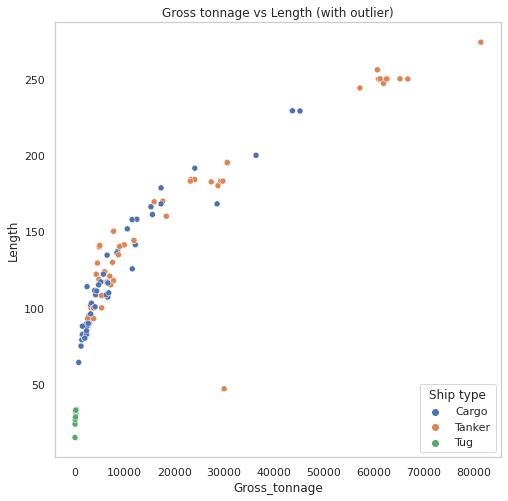

In [ ]:
### Code for 1 c) plot with the outlier 
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
# x, y axes Gross_tonnage and Length, hue for getting different ship types
ax = sns.scatterplot(x=shipframe['Gross_tonnage'], y=shipframe['Length'], hue=shipframe['Ship_type'])
ax.set_title('Gross tonnage vs Length (with outlier)') # to set title for the scatterplot

plt.legend(loc='lower right', title='Ship type') #to get the legend to lower right
plt.show()

In [ ]:
### Code for 1 c) find the outlier and replot
# So we can see the outlier which length is approx 50 meters and gross_tonnage approx 30 000
# Let's get rid of that outlier - first extracting all the ships which length is less than 60
outliers = shipframe[shipframe['Length'] < 60]
display(outliers)

# Then with gross_tonnage over 29 000 but less than 35 000 within these outliers
outlier = outliers[(outliers['Gross_tonnage'] < 31000) & (outliers['Gross_tonnage']> 29000)]
print('The outlier is')
display(outlier)

# Before replacement check if there's another vessel with Gross_tonnage being 30026
print('Checking if there is more than one vessel with Gross_tonnage of 30026')
display(shipframe.loc[shipframe['Gross_tonnage'] == 30026])

# And here we have it - only MMSI 230212000 is the outlier > let's replace the gross_tonnage value to 326
shipframe['Gross_tonnage'].replace(30026, 326, inplace=True)

,MMSI,Speed,COG,Ship_type,Gross_tonnage,Length,Breadth,Destination_Hamina,Destination_Helsinki,Destination_Kotka,Destination_Kronshtadt,Destination_Kunda,Destination_Muuga,Destination_Paldiski,Destination_Porvoo,Destination_Primorsk,Destination_Sillamäe,Destination_Tallinn,Destination_Ust-Luga,Destination_Valko-Loviisa,Destination_Viipuri,Destination_Vuosaari,Destination_Vysotsk
19,230044260,8.7386,85.4233,Tug,100,15.00,5.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37,276832000,9.7647,109.5592,Tug,286,33.30,9.22,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
45,230182000,9.9123,130.6157,Tug,298,30.99,10.49,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
48,230984090,8.1728,129.4353,Tug,107,23.80,7.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
81,218809000,7.1958,76.5210,Tug,324,32.58,10.06,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
82,220124000,8.6354,79.3140,Tug,366,33.24,9.75,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
83,230212000,9.5779,125.0369,Tanker,30026,46.92,8.13,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
85,230941170,9.0729,109.9310,Tug,139,26.83,7.50,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
86,230961000,7.1920,73.6897,Tug,256,32.89,9.02,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
109,230025450,7.9455,81.9485,Tug,196,28.43,8.50,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


The outlier is


,MMSI,Speed,COG,Ship_type,Gross_tonnage,Length,Breadth,Destination_Hamina,Destination_Helsinki,Destination_Kotka,Destination_Kronshtadt,Destination_Kunda,Destination_Muuga,Destination_Paldiski,Destination_Porvoo,Destination_Primorsk,Destination_Sillamäe,Destination_Tallinn,Destination_Ust-Luga,Destination_Valko-Loviisa,Destination_Viipuri,Destination_Vuosaari,Destination_Vysotsk
83,230212000,9.5779,125.0369,Tanker,30026,46.92,8.13,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Checking if there is more than one vessel with Gross_tonnage of 30026


,MMSI,Speed,COG,Ship_type,Gross_tonnage,Length,Breadth,Destination_Hamina,Destination_Helsinki,Destination_Kotka,Destination_Kronshtadt,Destination_Kunda,Destination_Muuga,Destination_Paldiski,Destination_Porvoo,Destination_Primorsk,Destination_Sillamäe,Destination_Tallinn,Destination_Ust-Luga,Destination_Valko-Loviisa,Destination_Viipuri,Destination_Vuosaari,Destination_Vysotsk
83,230212000,9.5779,125.0369,Tanker,30026,46.92,8.13,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


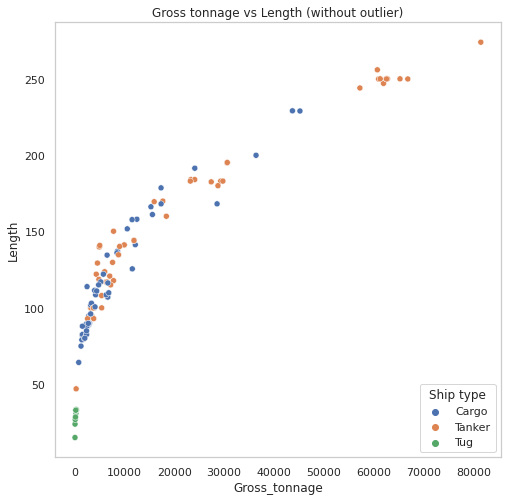

In [ ]:
### Code for 1 c) rerun the plot with the correction made

ax = sns.scatterplot(x=shipframe['Gross_tonnage'], y=shipframe['Length'], hue=shipframe['Ship_type'])
ax.set_title('Gross tonnage vs Length (without outlier)') # to set title for the scatterplot

plt.legend(loc='lower right', title='Ship type') #to get the legend to lower right
plt.show()

# As we can see from the plot, we don't have the outlier anymore
# It's the orange dot after the first green dots in the very left side of the plot

#### <font color = dimgrey> d) Exploit your domain knowledge and transform to improve the expected results and/or to avoid redundancy. 
- Find out what gross tonnage means. Make some transformation to Length values to acquire a linear relationship between the transformed length and Gross tonnage values. Plot the situation after the transformation **1p** 
- You can find the needed information in for example https://en.wikipedia.org/wiki/Gross_tonnage. Look at the formula and think how you can get the two variables similarly scaled. If you are having trouble, just experiment with different transformations before asking help. By plotting you can see what the relationship looks like after a transformation you have tried
  

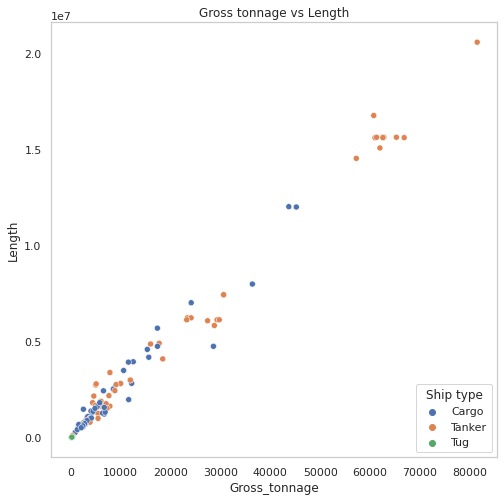

In [ ]:
### Code for 1d          
# Transformin all the Length values by nonlinear function of x^3
# Using lambda function here: for every x value, raise it to power of 3
shipframe['Length'] = shipframe['Length'].apply(lambda x: np.power(x,3))

# Plotting the variables to see the relationship
ax = sns.scatterplot(x=shipframe['Gross_tonnage'], y=shipframe['Length'], hue=shipframe['Ship_type'])
ax.set_title('Gross tonnage vs Length')
plt.legend(loc='lower right', title='Ship type')
plt.show()

<font color = red>According to Wikipedia, the formula of the gross tonnage $GT$ is 

\begin{equation}
GT = KV,
\end{equation}

<font color = red>where $K$ is a multiplier based on the ship volume and $V$ is the ship's total volume in cubic meters. $K$ can be calculated with a common logarithm and the $V$ value as

\begin{equation}
K = 0.2+0.02 \times log_{10}(V)
\end{equation}

<font color = red>So, the gross tonnage is _nonlinear_ measurement of the total internal volume of a ship. It is calculated from keel to funnel and is used to rank a ship for determining e.g. manning and safety. $V$ is about the ship volume in cubic meters so the length of a ship is one crucial measurement (cubic meter being calculated as $length \times breadth \times height$).

<font color = red>I used $x^3$ to transform all the Length values. Since the x-axis is nonlinear as described, when using linear variable on the y-axis, the non-linear dependency between variables can be seen in the plot. But when we use nonlinear variable on the y-axis aswell, we can observe linear dependency in the plot. I tried many other exponentials but visual inspection confirms that the power of 3 seems to be adequate. Another reason for $x^3$ could be that since there's $V$ parameter about the ship volume in cubic meters ($m^3$), it would fit to raise the Length values also to the third power.

-----------------

Wikipedia. 2021. Gross tonnage. https://en.wikipedia.org/wiki/Gross_tonnage (accessed: 30.11.2021)

#### <font color = dimgrey> e) The numerical variables have quite different ranges. To ensure that all variables can have the same importance on the model, perform Z-score standardization. Perform it for speed, transformed length, and breadth **1p**

In [ ]:
### Code for 1e
# Z-score standardization with the use of spicy.stats.zscore method
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html
# stats.zscore(<dataframe>) computes z score of each value in the column
display('before', shipframe[['Speed', 'Length', 'Breadth']].head())

# Z-score for Speed values
shipframe['Speed'] = stats.zscore(shipframe['Speed'])

# Z-score for  Length values
shipframe['Length'] = stats.zscore(shipframe['Length'])

# Z-score for  Breadth values
shipframe['Breadth'] = stats.zscore(shipframe['Breadth'])

display('after', shipframe[['Speed', 'Length', 'Breadth']].head())

'before'

,Speed,Length,Breadth
0,10.1377,8.549406e+05,15.34
1,13.5256,1.597510e+06,18.00
2,9.9416,2.815167e+06,21.90
3,11.6038,2.815167e+06,21.60
4,11.9203,9.970030e+05,15.00


'after'

,Speed,Length,Breadth
0,-0.161299,-0.569303,-0.489104
1,1.580209,-0.405892,-0.220696
2,-0.262102,-0.137933,0.172834
3,0.592331,-0.137933,0.142563
4,0.755024,-0.538041,-0.523412


______________
## <font color = lightcoral>2. Classification </font> 

Predict the **ship type** using **speed, destination, transformed length, and breadth** as features. Find an estimation for the classification accuracy (number of correctly classified ships to the total number of ships) using **random training and test sets**. <br>

Below is a summary of exercises for part 2
- a) Produce training and test data **1p**
     - Gather the normalized features and one-hot-coded destination columns as array __X__ (input variables), and the ship type as array **y** (output variable)     
     - Divide the data randomly into training (20%) and test (80%) sets
     - Do you need to use stratification? **Explain your decision**
- b) Train the model and test its performance **1p**
     - Use kNN classifier with k=3
     - Print out the confusion matrix. How does the model perform with different ship types?
     - What is the (total) classification accuracy?
 - Repeat the calculation 1000 times with different split of training/test data, and make a histogram of the results for classification accuracy **1p**
 - Discuss your results **1p**
 
 ______________

#### <font color = lightcoral> a) Produce training and test data 1p
- Gather the normalized features and one-hot-coded destination columns as array X (input variables), and the ship type as array y (output variable)
- Divide the data randomly into training (20%) and test (80%) sets
- Do you need to use stratification? **Explain your decision**

In [ ]:
### Code for 2a
# normalized features (speed, transformed length, breadth) and one-hot encoded destinations as array X
# so we DO NOT want MMSI, cog, shiptype or gross tonnage to be included
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html
# .to_numpy() to convert dataframe to numpy array
# firstly, using ~<dataframe>.isin(<column names>) to drop unwanted columns
# using tilde (~) to get the other columns but the ones inside .isin()
# and finally all inside <datadrame>.loc[] to access the information of rows and columns
arr_x = shipframe.loc[:, ~shipframe.columns.isin(['MMSI', 'COG', 'Ship_type', 'Gross_tonnage'])].to_numpy()

# the ship type as array y
arr_y = shipframe['Ship_type'].to_numpy()

# printing the 1st indexes to see if we got correct information
print('What we got:')
print('1st index of arr_x', arr_x[0])
print('1st index of arr_y', arr_y[0])
# Seems to be right

# Let's check how many different types there are and which are their counts
print(shipframe['Ship_type'].value_counts())
# See answer below why this information is used for stratification

# Then finally dividing the data randomly into training (80%) and test (20%) sets
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# random_state=50 to have reproducible results
# stratify by ship type (arr_y) to get all classes included (3 types, different count of each)
X_training, X_testing, Y_training, Y_testing = train_test_split(arr_x, arr_y, test_size=0.2, random_state=50, stratify=arr_y)

print('Training set of input variables (first 3 rows)')
display(X_training[:3, :])
print('Training set of output variables (first 5 rows)')
display(Y_training[:5])
print('The lengths of training sets are', len(X_training), len(Y_training), 'and test sets', len(X_testing), len(Y_testing))

What we got:
1st index of arr_x [-0.16129924 -0.56930326 -0.48910449  1.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
1st index of arr_y Cargo
Cargo     67
Tanker    58
Tug        9
Name: Ship_type, dtype: int64
Training set of input variables (first 3 rows)


array([[-0.31155243,  0.16247748,  0.52902985,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.75502418, -0.53804075, -0.52341229,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-0.81685139, -0.28173535, -0.37205436,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ]])

Training set of output variables (first 5 rows)


array(['Cargo', 'Tanker', 'Tanker', 'Tanker', 'Cargo'], dtype=object)

The lengths of training sets are 107 107 and test sets 27 27


<font color = red>I used stratification to include all the different ship types for both training and test sets.  As we can see below, there are unequal numbers of ship types so to ensure we can predict every type, we need them in both sets. By using parameter stratify = \<ship types> I ensured the described statification. 

> <font color = red>Cargo     67
>
> <font color = red>Tanker    58
>
> <font color = red>Tug        9

<font color = red>Firstly I tried to do the stratification by Destination but I noticed it wasn't possible since there were only one Helsinki destination mentioned (see the numbers below). The stratification by that sended only an error. Then I figured it out that of course one needs to divide also the output variables (since we have supervised KNN here) and there we have the ship types included.

> <font color = red>Hamina           19 
>
> <font color = red>Porvoo           18 
>
> <font color = red>Ust-Luga         16 
>
> <font color = red>Tallinn          12 
>
> <font color = red>Muuga            12
>
> <font color = red>Valko-Loviisa     9 
>
> <font color = red>Paldiski          9 
> 
> <font color = red>Kotka             8 
> 
> <font color = red>Vuosaari          7 
>
> <font color = red>Viipuri           6 
> 
> <font color = red>Vysotsk           5 
>
> <font color = red>Primorsk          5 
>
> <font color = red>Sillamäe          3 
>
> <font color = red>Kronshtadt        2 
>
> <font color = red>Kunda             2 
>
> <font color = red>Helsinki          1

_______________
#### <font color = lightcoral> b) Train the model and test its performance 1p
- Use a kNN classifier with k=3
- Print out the confusion matrix. <br>
- How does the model perform with different ship types? Where do you think the differences come from?<br>
- What is the (total) classification accuracy?

[[10  2  1]
 [ 4  8  0]
 [ 2  0  0]]
              precision    recall  f1-score   support

       Cargo       0.62      0.77      0.69        13
      Tanker       0.80      0.67      0.73        12
         Tug       0.00      0.00      0.00         2

    accuracy                           0.67        27
   macro avg       0.48      0.48      0.47        27
weighted avg       0.66      0.67      0.66        27

Accuracy 0.6666666666666666
--------------------------------------------------------


'The first 3 total accuracies'

[0.6716417910447762, 0.6865671641791045, 0.6417910447761194]

'1st cargo accuracy'

0.6666666666666666

'1st tanker accuracy'

0.7931034482758621

'1st tug accuracy'

0.6666666666666666

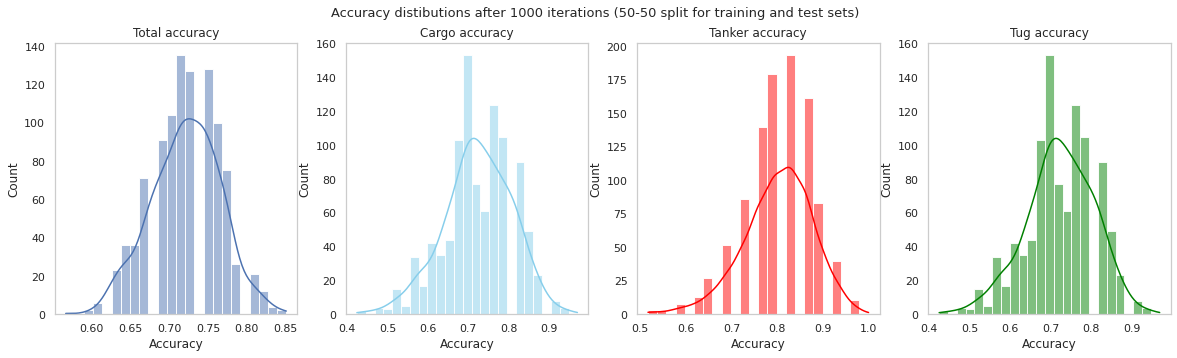

In [ ]:
### Code for 2b
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# n_neighbors=3 to have k=3
knn_model = KNeighborsClassifier(n_neighbors=3)

# Training the model using training sets
knn_model.fit(X_training, Y_training) # to fit the KNN from the training dataset

# Predicting the classes for X test set
y_predicted = knn_model.predict(X_testing)

# Printing the confusion matrix, classification results and total accuracy
print(metrics.confusion_matrix(Y_testing, y_predicted)) # -matrix(<true>, <predicted>)
print(metrics.classification_report(Y_testing, y_predicted)) 
print('Accuracy', metrics.accuracy_score(Y_testing, y_predicted))
print('--------------------------------------------------------')
############################################################################
# Repeat the calculation 1000 times with different split of training/test data, and make a histogram of the results for classification accuracy
# So let's use the split (50-50) for the training and test sets
# Stratification used again, but since we iterate 1000 times, we don't need random state for reproducible results

# KNN method
knn2_model = KNeighborsClassifier(n_neighbors=3)
accuracy_results = [] # variable for the results in for loop
cargo_accuracies = []
tanker_accuracies = []
tug_accuracies = []

for i in range(1000):
  # Dividing the data
  X2_training, X2_testing, Y2_training, Y2_testing = train_test_split(arr_x, arr_y, test_size=0.5, stratify=arr_y)
  # Training model
  knn2_model.fit(X2_training, Y2_training)
  # Predicting classes
  y2_predictions = knn2_model.predict(X2_testing)
  # Calculating the total accuracy of the model
  accuracy = metrics.accuracy_score(Y2_testing, y2_predictions)
  # Adding it to the result list
  accuracy_results.append(accuracy)

  # Calculating the confusion matrix for class accuracies
  conf_matrix = metrics.confusion_matrix(Y2_testing, y2_predictions)
  # Normalizing the diagonal values where the true positives are
  conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
  # Adding accuracies to the list of the results of each class
  cargo_accuracies.append(conf_matrix.diagonal()[0])
  tanker_accuracies.append(conf_matrix.diagonal()[1])
  tug_accuracies.append(conf_matrix.diagonal()[0])

# Printing some to see results
display('The first 3 total accuracies', accuracy_results[:3])
display('1st cargo accuracy', cargo_accuracies[0], '1st tanker accuracy', tanker_accuracies[0], '1st tug accuracy', tug_accuracies[0])

# Subplotting them - total accuracy in one and class accuracies in another histograms
fig, ax = plt.subplots(1,4, figsize=(20,5))
fig.suptitle('Accuracy distibutions after 1000 iterations (50-50 split for training and test sets)', size=13) # main title
# Total accuracy histogram
sns.histplot(accuracy_results, kde=True, ax=ax[0])
# Some titling and labeling
ax[0].set_title('Total accuracy')
ax[0].set(xlabel='Accuracy')
# Accuracy of Cargo, Tanker and Tug histograms
sns.histplot(cargo_accuracies, color='skyblue', label='Cargo', kde=True, ax=ax[1])
sns.histplot(tanker_accuracies, color='red', label='Tanker', kde=True, ax=ax[2])
sns.histplot(tug_accuracies, color='green', label='Tug', kde=True, ax=ax[3])
# Some titling and labeling
ax[1].set_title('Cargo accuracy')
ax[1].set(xlabel='Accuracy')
ax[2].set_title('Tanker accuracy')
ax[2].set(xlabel='Accuracy')
ax[3].set_title('Tug accuracy')
ax[3].set(xlabel='Accuracy')

plt.show()

<font color = red>Let's start the discussion and analysis with theory of the confusion matrix.

\begin{array}{cc|cc|c}
    &   &   Predicted \\ 
    &   & Positive & Negative & Totals \\ \hline
Actual    & Positive & TP & FN & P = (TP+FN) = Actual \ total \ positives \\ 
 & Negative  & FP & TN & N = (FP+TN) = Actual \ total \ negatives \\ \hline
    & Totals & Predicted  & Predicted \\  
    & & total & total \\
    & & positives & negatives
\end{array}

<font color = red>According the sources below, the confusion matrix helps to evaluate the performance of the ML model. It's $n \times n$ -sized matrix where $n$ is the number of class labels. The rows of confusion matrix show actual values and column show the predicted ones. The cells can be defined as 

> <font color = red>**True positives (TP)** = actual positives in the data, correctly predicted as positive
>
> <font color = red>**True negatives (TN)** = actual negatives in the data, correctly precidted as negative 
>
> <font color = red>**False positive (FP)** = actual negatives in the data, but predicted as positive 
>
> <font color = red>**False negative (FN)** = actual positives in the data, but predicted as negative 

<font color = red>So based on the above definitions of TP, TN, FP and FN we can two kinds of informations: which are *totals of predicted and actual values*. We have three classes which can be predicted from the data -- Cargo, Tanker and Tug. From the confusion matrix we can see the true positives, false negatives, false positives and true negatives of each class. Let's have them visualised.

\begin{array}{cc|ccc|c}
    &   &   & Predicted & & Actual \\ 
    &   & Cargo & Tanker & Tug & total \\\hline
    & Cargo & 10 & 2 & 1 & 13\\ 
Actual & Tanker & 4 & 8 & 0 & 12\\ 
    & Tug & 2 & 0 & 0 & 2 \\  \hline
 Predicted  & total & 16 & 10 & 1 & 27
\end{array}

<font color = red>The cells on the diagonal line show the TPs. Other cells in rows (expect the ones which are on the diagonal) are FNs for the class. E.g. **Cargo** has 10 true positives which means that out of the labels which have been predicted to be Cargo by KNN 10 are truly Cargo. Two are mispredicted as Tanker and one as Tug. So, we have 13 *actual* Cargo and 16 *predicted* which must mean there are 3 FNs and 6 FPs. 

<font color = red>Similarly out of the labels which have been predicted as **Tanker** there are eight truly Tanker and four mispredicted as Cargo. Actual total of Tanker is 12 and predicted total is 10 so there are 4 FPs and 3 FNs. No labels predicted as **Tug** were truly Tug but there were 2 mispredicted as Cargo. Out of 2 actual Tug and 1 predicted Tug, 2 are FPs and 1 FN. 

<font color = red>Total accuracy were 67% which is ok.

<font color = red> As noticed, Tugs were only mispredicted. The other two were better represented in the test set (and training set aswell) as noticed in the previous exercise (only 9 Tugs overall - divided into four set so only 2-3 in every set). That's really important to consider since it's a class which never occured. It seems like the model neglects the Tug class.

<font color = red>After the 50-50% split and 1000 iterations the total accuracy but also accuracies of each class can be seen to be quite close to *normal distribution* (see histograms above), on some runs it's also more negatively skewed. Even for the Tug class the distribution is closer to normal distribution or negatively skewed distribution even tho first KNN model couldn't get any correct predictions (then the accuracy were 0%). So the total accuracy of previous model was 67% which can be explained as "poorer luck" since there were times when the second trained KNN model could predict classes with approx. 80% accuracy.

<font color = red>Here we could talk about *the law of large numbers* which describes the result of performing the same experiment a large number of times. According to this law, the average obtained from a large number of iterations (here 1000) should be close to the expected value -- the generalization of the weighted average -- and will get closer to this value as more iterations are performed. 

----------

Beena, V. 2020. Understanding Confusion matrix and applying it on KNN-Classifier on Iris Data set. https://ai.plainenglish.io/understanding-confusion-matrix-and-applying-it-on-knn-classifier-on-iris-dataset-b57f85d05cd8 (accessed: 1.12.2021)

Wikipedia. 2021. Law of large numbers. https://en.wikipedia.org/wiki/Law_of_large_numbers (accessed: 2.12.2021)

__________
## 3. <font color = navy> Classification accuracy using leave-one-out cross validation

Again, predict the **ship type** using **speed, destination, transformed length, and breadth** of the ship as features. Find an estimation for the classification accuracy using *leave-one-out cross validation (LOO CV)*. <br>

 - a) Use leave-one-out cross validation to estimate the model performance **1p**
     - Use kNN classifier with k=3
     - What is the classification accuracy? Compare the result with the one you got in the previous task
 - b) Which method gives better evaluation of the performance of the classifier with this data set? Explain your choice **1p**

In [ ]:
### Code for 3
# Defining leave-on-out cross validation for use
loo_cv = LeaveOneOut()
# Defining KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
# Evaluating the model - arr_x has the input data and arr_y the output data
y_totalPred, y_totalActual = [], []
for train_i, test_i in loo_cv.split(arr_x): #train_i has the all but one datapoint
  # Dividing data into training and test sets
  X_training, X_testing = arr_x[train_i, :], arr_x[test_i, :] #save train and test split for inputs
  Y_training, Y_testing = arr_y[train_i], arr_y[test_i] # save train and test split for outputs
  # Training the model
  knn_model.fit(X_training, Y_training)
  # Predicting classes
  pred = knn_model.predict(X_testing)
  # Storing the evaluation scores
  y_totalActual.append(Y_testing[0])
  y_totalPred.append(pred[0])

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# Using cross_val_score for the same thing (evaluating the score by cross validation) but in a simpler way
scores = cross_val_score(knn_model, arr_x, arr_y, scoring='accuracy', cv=loo_cv, n_jobs=-1)

# Calculating accuracy based on the LOOCV
accuracy = metrics.accuracy_score(y_totalActual, y_totalPred)
print('Accuracy on the first try (for-loop):', accuracy)
# Accuracy based on the cross_val_score method
print('Accuracy on the second try (cross_val_score):', np.mean(scores))

Accuracy on the first try (for-loop): 0.746268656716418
Accuracy on the second try (cross_val_score): 0.746268656716418


#### a) <font color = navy> What is the classification accuracy? Compare the result with the one you got in the previous task **1p**

<font color = red> The classification accuracy of KNN with LOOCV is 74,6% which is better than the accuracy in the previous task (66,7%). This ship data set can be considered as imbalanced since there are huge differences between the number of instances (Cargo 67, Tanker 58, Tug 9). The majority classes such Cargo and Tanker dominate the dataset and thus, the classification task. 

<font color = red>It can be seen that after 1000 iterations, the estimated mean of the total accuracy is somewhere between approx. 73-75%. So now after the cross validation was used, the total accuracy is closer to that.
    
#### b) <font color = navy>  Which method gives better evaluation of the performance of the classifier with this data set? Why? 1p

<font color = red>The KNN model with cross validation gives the better evaluation of the performance due to imbalanced data set.

<font color = red>Cross validation is for validating the stability and generalizability of machine learning models. it uses different portions of the data to train and test a model on different iterations. With LOOCV test set is always 1, as i:th instance, and the rest of the data is considered as training set, remaining $n-1$ instances. In this case, the KNN model cannot overfit to the test instance since it's apart from the training set and the whole data is used for both training and testing simultaneously. 

<font color = red>With small data set (such as 134 instances in our set), LOOCV is appropriate.

----
Airola, A. 2021. Model selection, cross-validation, performance estimation. Lecture notes.

Wikipedia. 2021. Cross validation. 
https://en.wikipedia.org/wiki/Cross-validation_(statistics) (accessed: 2.12.2021)

____________
## <font color = forestgreen> 4. Model selection with leave-one-out cross validation

- a) Select the best model (kNN with selection of k) using leave-one-out cross validation (Repeat the model performance estimation with values k=1...30). Which value of k produces the best classification accuracy? **2p**
- b) If the number of k is still increased, what is the limit that the **1p** classification accuracy approaches? Why?
- d) Can you say something about the performance of this *selected* model with new, unseen data? Explain, how you could you estimate the performance of this selected model. **1p** 

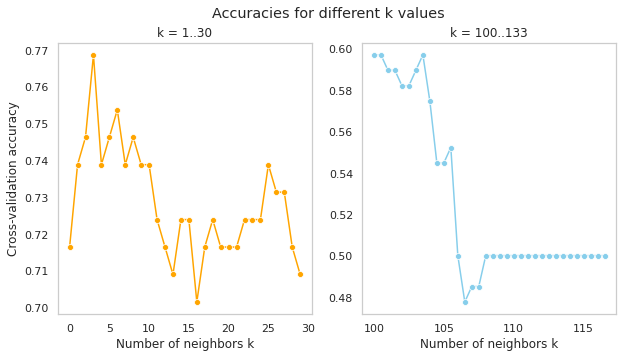

===== When k = 1...30 =====
The number of accuracies is 30
The max value in accuracies is 0.7686567164179104
The optimal value of k is then 4
==== When k = 100...133 ====
The number of accuracies is 34
The max value in accuracies is 0.5970149253731343
The min value in accuracies is 0.47761194029850745


In [ ]:
# Code for 4
# Using LOOCV and cross_val_score as in the previous exercise
# loo_cv (leave-one-out cross validation), arr_x (inputs), arr_y (outputs)
k_accuracies = [] # empty list for accuracies
neighbors = range(1,31) # as k = 1....30

# For-looping the accuracies of different k values
for k in neighbors: 
  knn_model = KNeighborsClassifier(n_neighbors=k) # (n_neighbors=k) as k neighbor number changes
  scores = cross_val_score(knn_model, arr_x, arr_y, scoring='accuracy', cv=loo_cv)
  k_accuracies.append(scores.mean())

tooManyK_accuracies = []
for k in range(100, 134): 
  knn_model = KNeighborsClassifier(n_neighbors=k) # (n_neighbors=k) as k neighbor number changes
  scores = cross_val_score(knn_model, arr_x, arr_y, scoring='accuracy', cv=loo_cv)
  tooManyK_accuracies.append(scores.mean())

# Plotting bot k values in subplot
fig, ax = plt. subplots(1,2, figsize=(10,5))
fig.suptitle('Accuracies for different k values')

# first plot
sns.lineplot(data=k_accuracies, marker='o', color='orange', ax=ax[0])
ax[0].set_title('k = 1..30')
ax[0].set(xlabel='Number of neighbors k', ylabel='Cross-validation accuracy')

# second plot
sns.lineplot(data=tooManyK_accuracies, marker='o', color='skyblue', ax=ax[1])
ax[1].set_title('k = 100..133')
ax[1].set(xlabel='Number of neighbors k')
ax[1].set_xticklabels(range(95, 134, 5))

plt.show()

print('===== When k = 1...30 =====')
print('The number of accuracies is', len(k_accuracies))
print('The max value in accuracies is', max(k_accuracies))
print('The optimal value of k is then', neighbors[k_accuracies.index(max(k_accuracies))])

print('==== When k = 100...133 ====')
print('The number of accuracies is', len(tooManyK_accuracies))
print('The max value in accuracies is', max(tooManyK_accuracies))
print('The min value in accuracies is', min(tooManyK_accuracies))
print('============================')

#### <font color = forestgreen>  a) Which value of k produces the best classification accuracy? **1p**</font>

<font color = red> As clearly can be seen from the plot, the k value of 4 produces smallest error and thus, produces the best classification accuracy. The best accuracy is 76,7%.

#### <font color = forestgreen> b) If the number of k is still increased, what is the limit that the classification accuracy approaches? Why?

<font color = red> The limit it's approaching is called underfitting. If k value gets too big, the model can neither model the training data nor generalize to new data. As seen from the plot on the right side, when the k is getting big enough, it's getting close to accuracy of 50% - that's called very uncertain accuracy. 

<font color = red>Even there are three classes - three types of ships - the Tug is so underrepresented in the whole dataset, but also in the training and testing sets that when a class is predicted based on 120 neighbor it can never be Tug, so there's only 50%-50% chance to get Cargo or Tanker. 

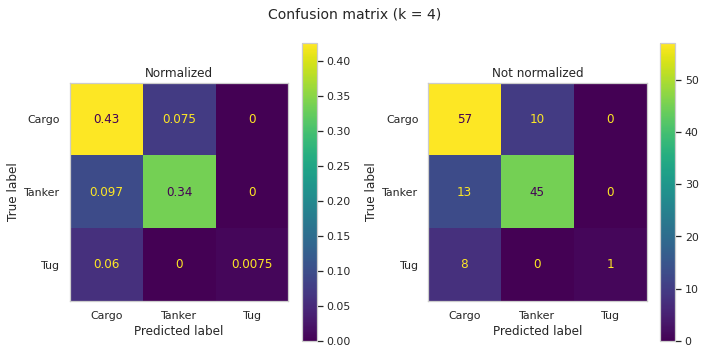

Total accuracy of the model is 0.7686567164179104
              precision    recall  f1-score   support

       Cargo       0.73      0.85      0.79        67
      Tanker       0.82      0.78      0.80        58
         Tug       1.00      0.11      0.20         9

    accuracy                           0.77       134
   macro avg       0.85      0.58      0.59       134
weighted avg       0.79      0.77      0.75       134



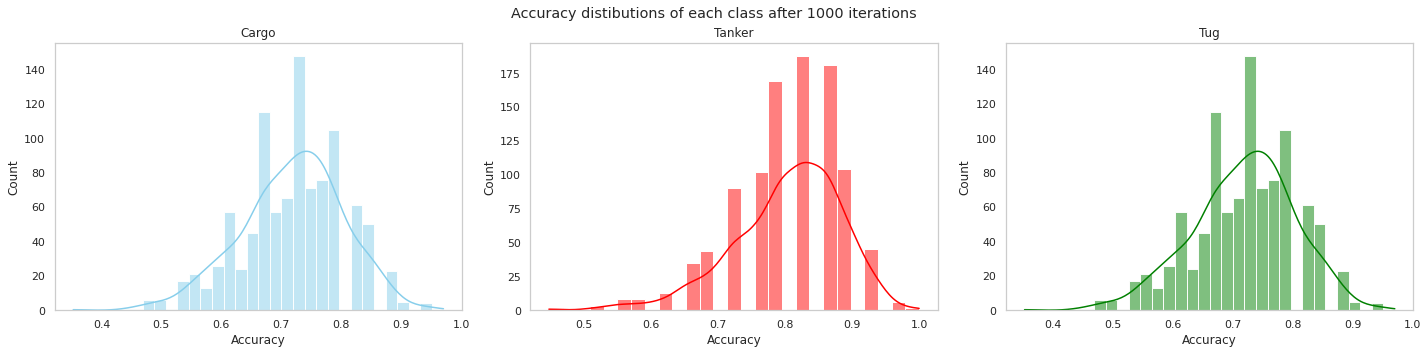

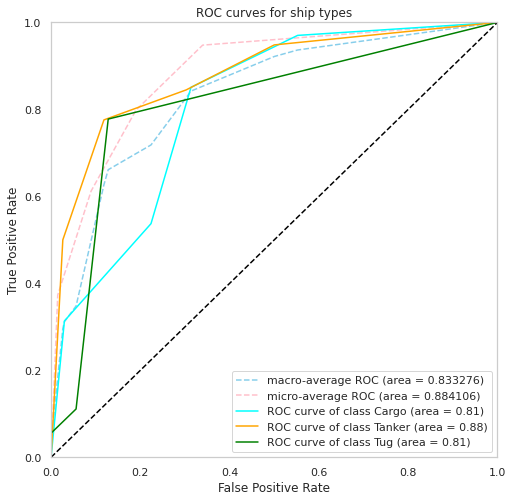

In [ ]:
# Evaluating example for the performance of KNN model when k = 4
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html
# to generate cross-validated estimates for each input
knn = KNeighborsClassifier(n_neighbors=4)
y_pred = cross_val_predict(knn, arr_x, arr_y, cv=loo_cv) 

# Getting the confusion matricies in a subplot
fig, ax = plt.subplots(1,2, figsize=(10, 5))
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
conf_matrix = metrics.confusion_matrix(arr_y, y_pred) # not normalized
conf_matrix_norm = metrics.confusion_matrix(arr_y, y_pred, normalize='all') # normalizing to get the accuracies

# Titling
fig.suptitle('Confusion matrix (k = 4)', size=14)
ax[0].set_title('Normalized', size=12)
ax[1].set_title('Not normalized', size=12)

# Getting them into subplot
cmd = metrics.ConfusionMatrixDisplay(conf_matrix_norm, display_labels=['Cargo', 'Tanker', 'Tug'])
cmd.plot(ax=ax[0])
cmd2 = metrics.ConfusionMatrixDisplay(conf_matrix, display_labels=['Cargo', 'Tanker', 'Tug'])
cmd2.plot(ax=ax[1])

fig.tight_layout()
fig.subplots_adjust(top=0.88) # to adjust the title
plt.show()

print('=====================================================================')
# Calculating total accuracy
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross#sklearn.model_selection.cross_val_score
# to evaluate a score by cv
scores = cross_val_score(knn, arr_x, arr_y, cv=loo_cv)
print('Total accuracy of the model is', scores.mean())
print(metrics.classification_report(arr_y, y_pred))
print('=====================================================================')

# Doing some iterations with the chosen k
accuracy_results, cargo_accuracies, tanker_accuracies, tug_accuracies = [], [], [], []
for i in range(1000):
  # Dividing the data
  X2_training, X2_testing, Y2_training, Y2_testing = train_test_split(arr_x, arr_y, test_size=0.5, stratify=arr_y)
  # Training model
  knn2_model.fit(X2_training, Y2_training)
  # Predicting classes
  y2_predictions = knn2_model.predict(X2_testing)
  # Calculating the total accuracy of the model
  accuracy = metrics.accuracy_score(Y2_testing, y2_predictions)
  # Adding it to the result list
  accuracy_results.append(accuracy)

  # Calculating the confusion matrix for class accuracies
  conf_matrix = metrics.confusion_matrix(Y2_testing, y2_predictions)
  # Normalizing the diagonal values where the true positives are
  conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
  # Adding accuracies to the list of the results of each class
  cargo_accuracies.append(conf_matrix.diagonal()[0])
  tanker_accuracies.append(conf_matrix.diagonal()[1])
  tug_accuracies.append(conf_matrix.diagonal()[0])

# Subplotting them - total accuracy in one and class accuracies in another histograms
fig, ax = plt.subplots(1,3, figsize=(20,5))
fig.suptitle('Accuracy distibutions of each class after 1000 iterations') # main title
# Accuracy of Cargo, Tanker and Tug histograms
sns.histplot(cargo_accuracies, color='skyblue', label='Cargo', kde=True, ax=ax[0])
sns.histplot(tanker_accuracies, color='red', label='Tanker', kde=True, ax=ax[1])
sns.histplot(tug_accuracies, color='green', label='Tug', kde=True, ax=ax[2])
# Some titling and labeling
ax[0].set_title('Cargo')
ax[0].set(xlabel='Accuracy')
ax[1].set_title('Tanker')
ax[1].set(xlabel='Accuracy')
ax[2].set_title('Tug')
ax[2].set(xlabel='Accuracy')

fig.tight_layout()
fig.subplots_adjust(top=0.88) # To adjust the title
plt.show()

print('=====================================================================')
# Let's try the ROC for multiclass
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
# Binarize the output
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html#sklearn.preprocessing.label_binarize
BinArr_y  = preprocessing.label_binarize(arr_y, classes=['Cargo', 'Tanker', 'Tug'])
n_classes = BinArr_y.shape[1]
y_score = cross_val_predict(knn, arr_x, arr_y, cv=loo_cv, method='predict_proba')

# Computing ROC curve and AUC for each class
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html?highlight=auc#sklearn.metrics.auc
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = metrics.roc_curve(BinArr_y[:, i], y_score[:, i])
  roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Computing micro-average ROC curve and area
fpr['micro'], tpr['micro'], _ = metrics.roc_curve(BinArr_y.ravel(), y_score.ravel())
roc_auc['micro'] = metrics.auc(fpr['micro'], tpr['micro'])

# Aggregating all the false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolating all the ROC curves
# https://numpy.org/doc/stable/reference/generated/numpy.interp.html
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
  mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Averaging the interpolated curves
mean_tpr /= n_classes

fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = metrics.auc(fpr['macro'], tpr['macro'])

# FINALLY the plotting part
# Macro average
ax = sns.lineplot(x=fpr['macro'], y=tpr['macro'], linestyle='dashed', color='skyblue', label='macro-average ROC (area = {0:02f})'.format(roc_auc['macro']))
# Micro average
sns.lineplot(x=fpr['micro'], y=tpr['micro'], linestyle='dashed', color='pink', label='micro-average ROC (area = {0:02f})'.format(roc_auc['micro']))

# The curves of each class with for loop
colors = ['aqua', 'orange', 'green']
classes = ['Cargo', 'Tanker', 'Tug']
for i in range(n_classes):
  sns.lineplot(x=fpr[i], y=tpr[i], color=colors[i], label='ROC curve of class {0} (area = {1:0.02f})'.format(classes[i], roc_auc[i]))

# Let's get the random guess line then
sns.lineplot(x=[0,1], y=[0,1], color='black', linestyle='--')

# Some titling and rescaling the limits of x-axis and y-axis
ax.set(title='ROC curves for ship types', xlabel='False Positive Rate', ylabel='True Positive Rate', xlim=[0.0, 1.0], ylim=[0.0, 1.0])
plt.show()

#### <font color = forestgreen> c) Can you say something about the performance of this *selected* model with new, unseen data? Explain, how you could you estimate the performance of this selected model. **1p**

<font color = red> The best accuracy was performed with the k value of 4 (76,9%) and it's the most accurate selection out of other KNNs which have been used for classification in the previous exercises. 

<font color = red>Sure if it's about new data which is much different from the training data, training should be considered doing again. KNN is such algoritm which doesn't do any calculations or learn any model but do the predictions just-in-time by calculating the similarity between an input sample and each training instance. Because the training style the consistency of the training data should be proper thought through by curating it, updating as new data is available and removing erroneous data and outliers. 

<font color = red> The performance of the model could be estimated with e.g. different split of data, the metrics of the confusion matrix and the accuracy rates among each classes. The accuracy measure among imbalanced data is quite challenging and can result in misleading interpretation. So in addition,precision, recall and F-score can be calculated with the confusion matrix since it gives TPs, FPs and FNs. 

<font color = red>Precision is about the number of positive class predictions that actually belong to the positive class. Recall is about the number of positive class predictions made out of all positive examples in dataset. F-score is about providing a single score that balances both the concerns of precision and recall in one number. It's the harmonic mean of these two so it could be considered as a better measure than accuracy. To have a good classifier, the presicion and recall should be closer to 1, which means FPs and FNs are closer to zero. We have printed the metrics but let's repeat where the values come from.

\begin{equation}
Precision = \frac{TP}{TP+FP},  Recall = \frac{TP}{TP+FN}
\end{equation}

<font color = red>Calculating TP, TN, FP and FN values for each class next
 > <font color = red>Cargo | **TP** = 57 | **TN** = 45+0+0+1 = 46 | **FP** = 13+8 = 21  | **FN** = 10+0 = 10
 >
 > <font color = red>Tanker | **TP** = 45 | **TN** = 57+0+8+1 = 66 | **FP** = 10+0 = 10 | **FN** = 13+0 = 13 
 >
 > <font color = red>Tug | **TP** = 1 | **TN** = 57+10+13+45 = 125 | **FP** = 10+0 = 10 | **FN** = 0+0 = 0 

<font color = red>So the precision and recall values are calculated as 

\begin{align*}
Cargo \,| \, Precision &= \frac{57}{57+21} = 0,73 \, | \, Recall = \frac{57}{57+10} = 0,85 \\
Tanker \,| \, Precision &= \frac{45}{45+10} = 0,81 \, | \, Recall = \frac{45}{45+13} = 0,78 \\
Tug \,| \, Precision &= \frac{1}{1+10} = 0,09 \, | \, Recall = \frac{1}{1+0} = 1
\end{align*}

<font color = red>F-score is then 

\begin{equation}
Fscore = 2*\frac{Precision \times Recall}{Precision + Recall}
\end{equation}

<font color = red>So to calculate F-score (providing that one number to balance precision and recall) we can calculate them for each class as

\begin{align*}
Cargo \,| \, Fscore &= 2*\frac{0,73\times0,85}{0,73+0,85} = 0,785  \\
Tanker \,| \, Fscore &= 2*\frac{0,81\times0,78}{0,81+0,78} = 0,795 \\
Tug \,| \, Fscore &= 2*\frac{0,09\times1}{0,09+1} = 0,165
\end{align*}

<font color = red> it's kinda obvious to tell that Tug-class (with f-score of 0.20) is a challenging class for the model even tho the precision is 1. The f-scores of Cargo and Tanker were almost the same (0.79, 0.8) so the model performs quite well with them. 

<font color = red> Other way to illustrate the performance of KNN is the ROC curve which is about the true positive rate (TPR) against false positive rate (FPR). It's printed above. The ROC curve tells about the trade-off between sensitivity and specificity at all classification thresholds, i.e. between benefits and costs. The AUC (the area under the ROC curve) is and indicator how well the KNN soves the problem: the larger the area, the better the solution. The TPR and FPR are defined as

\begin{equation}
TPR = \frac{TP}{TP+FN} = Recall, \,  FPR = \frac{FP}{FP+TN}
\end{equation}

----

Airola, A. 2021. Model selection, evaluation. Lecture notes.

Brownlee, Jason. 2020. How to Calculate Precision, Recall and F-Measure for Imbalanced Classification. https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/ (accessed: 6.11.2021)

Brownlee, Jason. 2016. K-Nearest Neighbors for Machine Learning. https://machinelearningmastery.com/k-nearest-neighbors-for-machine-learning/ (accessed: 5.11.2021)

Harikrishnan, N.B. 2019. Confusion Matrix, Accuracy, Precision, Recall, F1 Score. https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd (accessed: 6.11.2021)

________________
### <font color = red>  5. Testing with training data <font color = red> (this should never be done out of this exercise!) </font>

- Repeat the previous task but use the whole data for training **2p**
- Plot the resulting classification accuracy versus k=1...30. **Include the values from the previous task in the same figure**
- Comment your result. **Why** shouldn't you test with training data?

In [ ]:
### CODE FOR 5: Repeat the previous task but use whole data for training
test_accuracies = [] # empty list for accuracies
neighbors = range(1,31) # as k = 1....30

# For-looping the accuracies of different k values
for k in neighbors:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  
  y_testPred, y_testActual = [], []
  for train_i, test_i in loo_cv.split(arr_x): #train_i has the all but one datapoint
    # Dividing data into training and test sets
    X_training, X_testing = arr_x[train_i, :], arr_x[test_i, :] #save train and test split for inputs
    Y_training, Y_testing = arr_y[train_i], arr_y[test_i] # save train and test split for outputs
    # Training the model
    knn_model.fit(arr_x, arr_y) # !! using the whole data for training
    # Predicting classes
    pred = knn_model.predict(X_testing)
    y_testActual.append(Y_testing[0])
    y_testPred.append(pred[0])

  test_accuracies.append(metrics.accuracy_score(y_testActual, y_testPred))

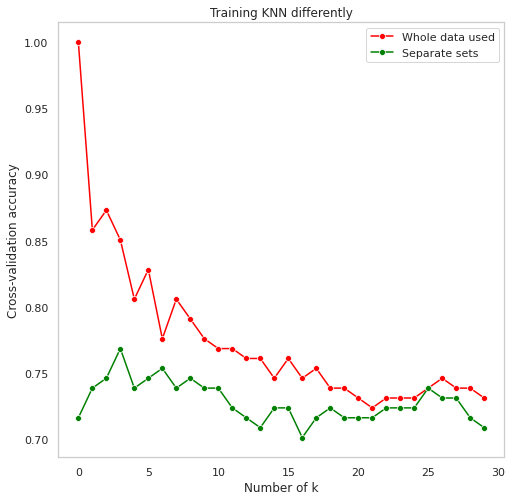

In [ ]:
### CODE FOR 5: The plot
ax = sns.lineplot(data=test_accuracies, marker='o', color='red', label='Whole data used')
sns.lineplot(data=k_accuracies, marker='o', color='green', label='Separate sets')
ax.set(title='Training KNN differently', xlabel='Number of k', ylabel='Cross-validation accuracy')
plt.legend()
plt.show()

<font color = red> As the plot shows, the overall accuracy of every k value increased. It falsely assumes the k value of 1 performs most accurately, where the model actually is only overfitting. When k = 1, the error rate is always zero for training data, sinec the closes point to any training data point is itself. Choosing k value is about the model generalizing to the new data, not the smallest amount of errors on training data. So in this case, when the model is trained with the whole data set, we are just asking the model to make predictions to data it has already seen.

<font color = red>Since machine learning is all about generalizing and being able to apply patterns in training data to new, unseen data, of course the model will perform perfectly, if we use the same data for training **and** testing. It's the same than if a student is prepared for an exam with same set of questions which are included in exam, the student will ace the exam.

----------

Airola, A. 2021. Principles of Modelling. Lecture notes.